In [1]:
!git clone https://github.com/Ashutosh-Vermaa/EDA-and-Feature-Engineering.git

fatal: destination path 'EDA-and-Feature-Engineering' already exists and is not an empty directory.


In [2]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
matches= pd.read_csv('/content/EDA-and-Feature-Engineering/IPL data/IPL Matches 2008-2020.csv')
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches.shape

(816, 17)

In [6]:
teams=pd.concat([matches.team1, matches.team2]).unique() # Rising Pune Supergiants and Rising Pune Supergiant as 2 different teams
#delhi daredevils changed to Delhi capitals so we consider them same
#DCh is Deccan Chargers
acro= ['RCB', 'KXIP', 'DC', 'MI', 'KKR', 'RR', 'DCh', 'CSK', 'KTK', 'PW', 'SRH', 'GL', 'RPS', 'RPS', 'DC']

matches.replace(teams, acro, inplace=True)

In [7]:
deliveries= pd.read_csv('/content/EDA-and-Feature-Engineering/IPL data/IPL Ball-by-Ball 2008-2020.csv')
deliveries.replace(teams, acro, inplace=True)

In [8]:
matches.date.isnull().sum()
matches['season']= matches.date.str[:4].astype(int)

##1. Quick Analysis

###1.1 Number of matches during each session

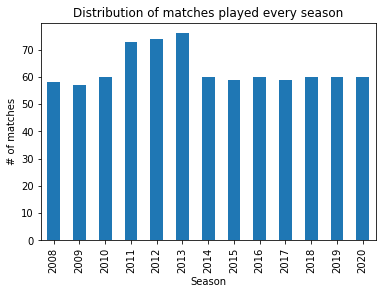

In [9]:
matches.groupby('season')['id'].count().plot.bar()
plt.title("Distribution of matches played every season")
plt.xlabel("Season")
plt.ylabel("# of matches")
plt.show()



*   Number of matches played per season increased from 2011 to 2013 due to the addition of two new frenchises-Sahara Pune Warriors and Kochi.
*   2013 had maximum number of matches (76) mostly due to super over games
* Number of matches reduced after 2013 IPL season due to withdrawal of 2 teams




###1.2 Matches Played Vs wins for each team

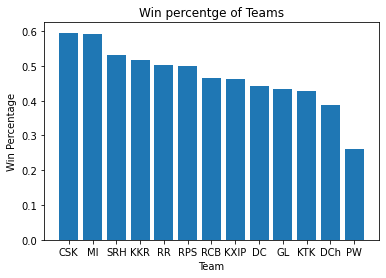

In [10]:
matches_played= pd.concat([matches.team1, matches.team2]).value_counts().reset_index() #reset_index converts the object into a dataframe
matches_played.columns=['team', 'count']

wins= matches.winner.value_counts().reset_index()
wins.columns=['team', 'wins']

matches_played= matches_played.merge(wins, on='team')
matches_played['winPercentage']= matches_played.wins/matches_played['count'].astype(int)
matches_played.sort_values('winPercentage', inplace=True, ascending=False)
#win percentage of every team
plt.bar(matches_played.team, matches_played.winPercentage)
plt.title("Win percentge of Teams")
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.show()



*  CSK has the highest winning percentage followed by MI and SRH


###1.3 Most used Venues

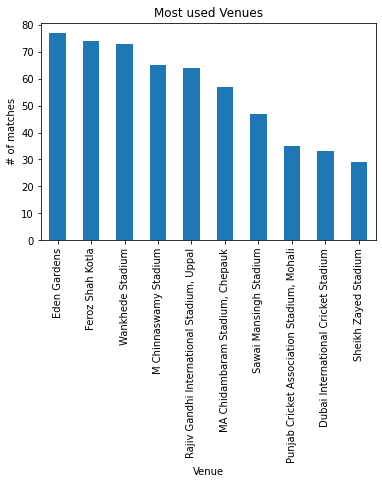

In [11]:
matches.venue.value_counts()[:10].plot.bar()
plt.title("Most used Venues")
plt.xlabel("Venue")
plt.ylabel("# of matches")
plt.show()



*   Most used venue is Eden Gardens followed by Feroz Shah Kotla and Wankhede probably due to better facilities, improved drainage system, new machineries that can absorb water left on the pitch cover in case of rain.
* Moreover most of the eliminators, qualifiers and final of each season was here



###1.4 Most standing Umpires 

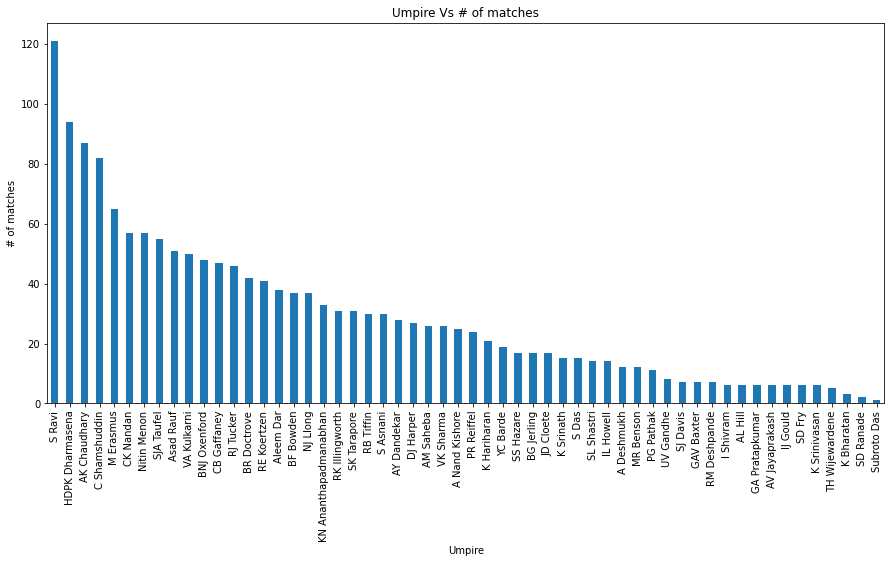

In [12]:
umpires= pd.concat([matches.umpire1, matches.umpire2])
umpires.value_counts().plot.bar(figsize= (15,7))
plt.title("Umpire Vs # of matches")
plt.xlabel("Umpire")
plt.ylabel("# of matches")
plt.show()



*  S Ravi has umpired in most of the matches followed by Dharamsena



###1.5 Frequent Choice of teams after winning Toss

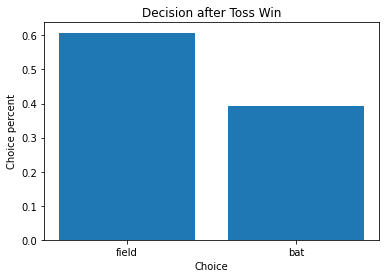

In [13]:
tossDecision=matches.toss_decision.value_counts().reset_index()
tossDecision['ratio']=tossDecision.toss_decision/tossDecision.toss_decision.sum()
plt.bar(tossDecision['index'], tossDecision.ratio)

plt.title("Decision after Toss Win")
plt.xlabel("Choice")
plt.ylabel("Choice percent")
plt.show()



*   60% of the times, teams have chosen to field first after winning the toss



##2.Runs per Season

In [14]:
matches.id.nunique() #means every match has a unique id

816

###2.1 Average and Total Runs per Season

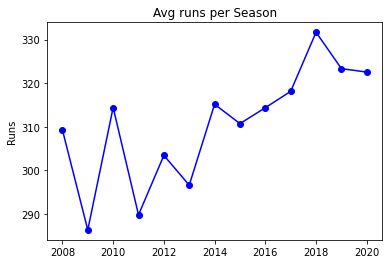

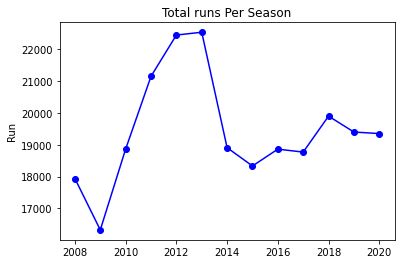

In [15]:
data= matches[['id', 'season']].merge(deliveries, on='id')

total=data.groupby('season')['total_runs'].sum().reset_index()

count= matches.groupby('season').count().id.reset_index()

avg= total.total_runs/count.id

plt.plot(total['season'], avg, linestyle='-', marker='o', color='b', label='line with marker')
# plt.scatter(total['season'], avg)
plt.title("Avg runs per Season")
plt.ylabel('Runs')
plt.show()

plt.plot(total['season'], total.total_runs, linestyle='-', marker='o', color='b', label='line with marker')
# plt.scatter(total.season, total.total_runs )
plt.title("Total runs Per Season")
plt.ylabel("Run")
plt.show()



*   Average runs has gone up after 2013 whereas total runs have come down possibly due to less number of matches per season after 2013 



###2.2 Distribution of Runs over 6s, 4s and others

##3. Target >=200

In [16]:
temp=deliveries.groupby(['id', 'inning', 'batting_team'])[ 'total_runs'].sum().reset_index()
temp

,id,inning,batting_team,total_runs
0,335982,1,KKR,222
1,335982,2,RCB,82
2,335983,1,CSK,240
3,335983,2,KXIP,207
4,335984,1,RR,129
...,...,...,...,...
1625,1237178,2,SRH,132
1626,1237180,1,DC,189
1627,1237180,2,SRH,172
1628,1237181,1,DC,156


In [17]:
innings_runs=deliveries.groupby(['id', 'inning', 'batting_team', 'bowling_team'])[ 'total_runs'].sum().reset_index()

two_hundred= innings_runs[innings_runs['total_runs']>=200]
two_hundred.sort_values('total_runs', ascending=False)[:10]

,id,inning,batting_team,bowling_team,total_runs
700,598027,1,RCB,PW,263
1116,980987,1,RCB,GL,248
292,419137,1,CSK,RR,246
1354,1136604,1,KKR,KXIP,245
2,335983,1,CSK,KXIP,240
1000,829795,1,RCB,MI,235
1480,1178422,1,KKR,MI,232
472,501260,1,KXIP,RCB,232
850,733987,1,KXIP,CSK,231
1408,1175366,1,SRH,RCB,231


###3.1 How many times each scored >=200 

In [18]:
batting=two_hundred[(two_hundred['inning']==1) & (two_hundred['total_runs']>=200)]
batting=batting.groupby('batting_team').agg({'id':'count'}).reset_index().sort_values('id', ascending=False)

In [19]:
bowling=two_hundred[(two_hundred['inning']==2) & (two_hundred['total_runs']>=200)]
bowling=bowling.groupby('batting_team').agg({'id':'count'}).reset_index().sort_values('id', ascending=False)

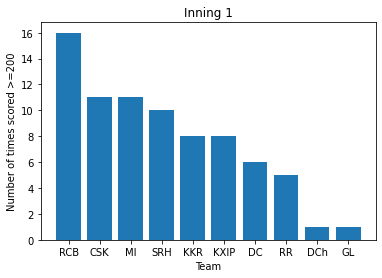

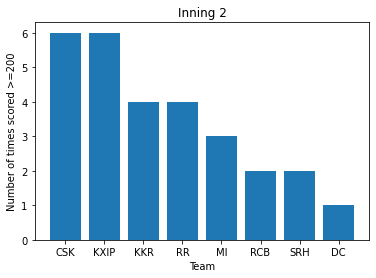

In [20]:
plt.bar(batting['batting_team'], batting['id'])
plt.xlabel("Team")
plt.ylabel("Number of times scored >=200")
plt.title("Inning 1")
plt.show()

plt.bar(bowling['batting_team'], bowling['id'])
plt.xlabel("Team")
plt.ylabel("Number of times scored >=200")
plt.title("Inning 2")
plt.show()

* RCB has scored most number of 200(+) scored in the first inning followed by CSK and MI
* CSK and KXIP have scored most number of 200(+)- 6 times

###3.2 How many times target >200 is chased down

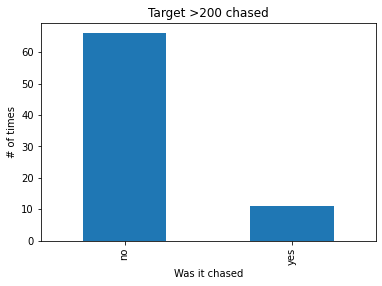

In [21]:
inning1= innings_runs[(innings_runs['inning']==1) & (innings_runs['total_runs']>=200)]
inning2= innings_runs[innings_runs['inning']==2]

merged= inning1.merge(inning2[['id', 'inning', 'total_runs']], on = 'id')

merged['chased>200']= np.where(merged['total_runs_x']<merged['total_runs_y'], 'yes', 'no')
merged['chased>200'].value_counts().plot.bar()

plt.title("Target >200 chased")
plt.xlabel("Was it chased")
plt.ylabel("# of times")
plt.show()



*   200+ target has been chased only 11 times 
* whereas teams have failed to chase 200+ target 66 times



##4. Average Score of each team per season

In [22]:
data=matches[['id', 'season']].merge(deliveries, on='id')

In [23]:
runs_per_match=data.groupby(['season','inning', 'batting_team', 'id']).agg({'total_runs':'sum'}).reset_index()
runs_per_season=runs_per_match.groupby(['season', 'batting_team', 'inning']).agg({'id':'count', 'total_runs':'sum'}).reset_index()
runs_per_season['avg']=runs_per_season['total_runs']/runs_per_season['id']

inning1=runs_per_season[runs_per_season['inning']==1].groupby('batting_team')
inning2=runs_per_season[runs_per_season['inning']==2].groupby('batting_team')

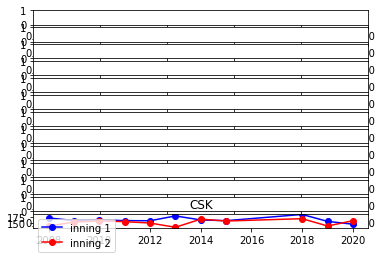

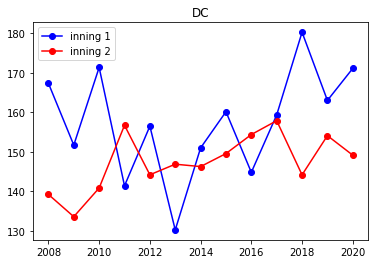

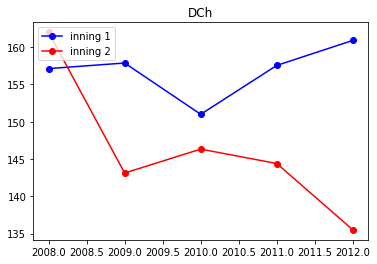

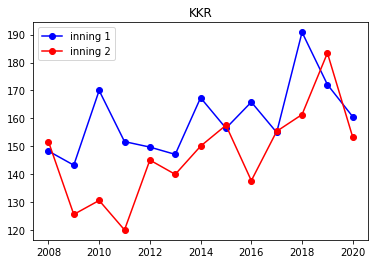

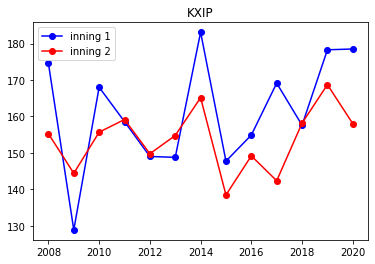

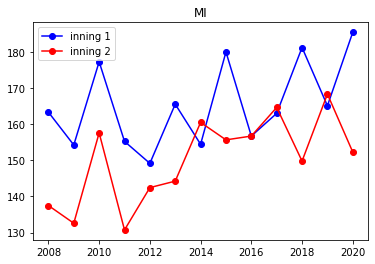

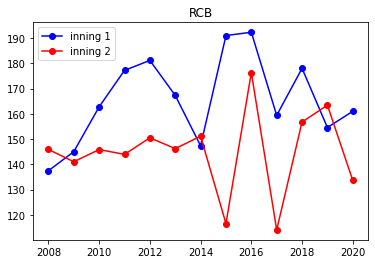

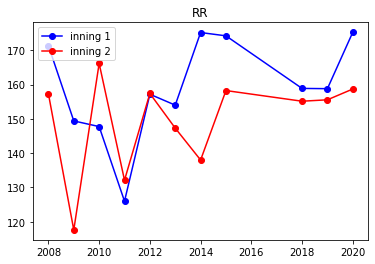

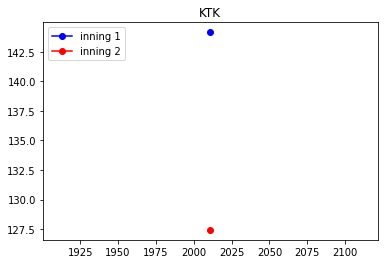

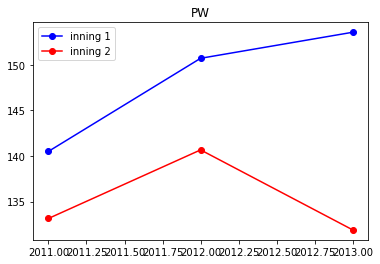

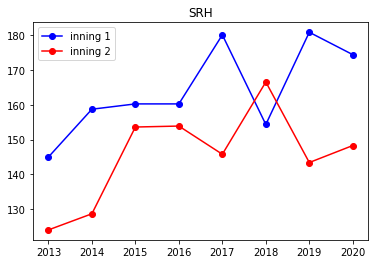

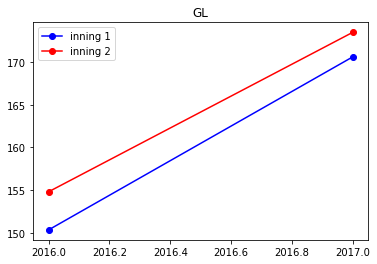

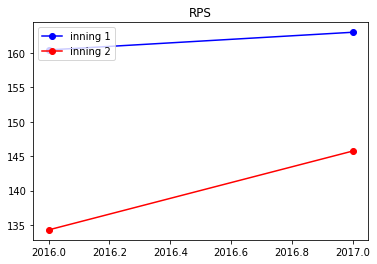

In [24]:
fig, axs = plt.subplots(13)
for team in runs_per_season['batting_team'].unique():
  temp= inning1.get_group(team)
  plt.plot(temp['season'], temp['avg'], linestyle='-', marker='o', color='b', label='inning 1')
  temp= inning2.get_group(team)
  plt.plot(temp['season'], temp['avg'], linestyle='-', marker='o', color='r', label='inning 2')

  plt.legend(loc="upper left")
  plt.title(team)
  plt.show()



*   Most of the teams had higher average score in the first inning compared to 2nd 

We can remove teams which didn't play enough matches like DCh, GL, RPS, KTK


##5. Runs per over of each team

In [25]:
deliveries.replace(teams, acro, inplace=True)
runs_per_over=deliveries.groupby(['id','inning', 'batting_team', 'over'])['total_runs'].sum().reset_index()
runs_per_over.head()

,id,inning,batting_team,over,total_runs
0,335982,1,KKR,0,3
1,335982,1,KKR,1,18
2,335982,1,KKR,2,6
3,335982,1,KKR,3,23
4,335982,1,KKR,4,10


In [26]:
runs_per_over=runs_per_over.groupby([ 'batting_team', 'over'])['total_runs'].sum().reset_index()
runs_per_over

,batting_team,over,total_runs
0,CSK,0,902
1,CSK,1,1190
2,CSK,2,1382
3,CSK,3,1476
4,CSK,4,1530
...,...,...,...
255,SRH,15,976
256,SRH,16,957
257,SRH,17,1084
258,SRH,18,1135


In [27]:
runs_per_over=runs_per_over.pivot(index ='over', columns ='batting_team')
col_names=[col_name[1] for col_name in runs_per_over.columns]
runs_per_over.columns= col_names
runs_per_over=runs_per_over.reset_index()

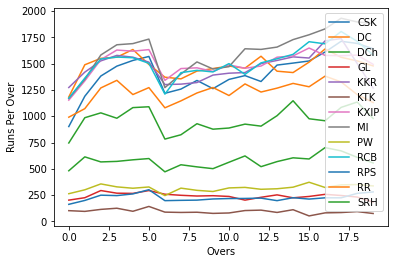

In [28]:
for col in runs_per_over.columns[1:]:
  plt.plot(runs_per_over['over'],runs_per_over[col] , label =col)

plt.xlabel("Overs")
plt.ylabel("Runs Per Over")
plt.legend()
# plt.title('multiple plots')
plt.show()



*   Teams score more runs in first 6 overs due to powerplay
*   Runs scored in middle overs is lower
* Teams score more runs towards the end of the inning 



##6. Power Play Analysis

###6.1 Runs in Power Play of Each Match

In [29]:
powerplay= deliveries[deliveries['over']<=6]

powerplay_runs=powerplay.groupby(['id', 'inning'])['total_runs'].sum().reset_index()
powerplay_inning1= powerplay_runs[powerplay_runs['inning']==1].reset_index()
powerplay_inning2= powerplay_runs[powerplay_runs['inning']==2].reset_index()
powerplay_inning1['matches']=powerplay_inning1.index
powerplay_inning2['matches']=powerplay_inning2.index

In [30]:
powerplay_inning2

,index,id,inning,total_runs,matches
0,1,335982,2,33,0
1,3,335983,2,69,1
2,5,335984,2,59,2
3,7,335985,2,46,3
4,9,335986,2,33,4
...,...,...,...,...,...
809,1621,1216547,2,41,809
810,1623,1237177,2,36,810
811,1625,1237178,2,49,811
812,1627,1237180,2,52,812


Text(0.5, 0, 'matches')

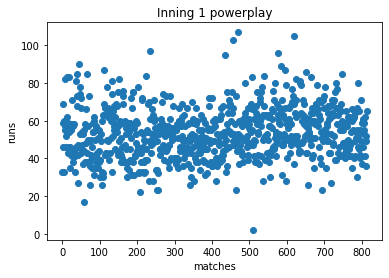

In [31]:
plt.scatter(powerplay_inning2['matches'], powerplay_inning2['total_runs'])
plt.title('Inning 1 powerplay')
plt.ylabel('runs')
plt.xlabel('matches')

Text(0.5, 0, 'matches')

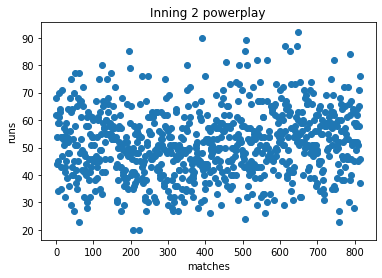

In [32]:
plt.scatter(powerplay_inning1['matches'], powerplay_inning1['total_runs'])
plt.title('Inning 2 powerplay')
plt.ylabel('runs')
plt.xlabel('matches')



*   In first inning, the variance of the score in powerplay is lower meaning teams score runs consistently
*   2nd inning has more variance in the powerplay score implying higher uncertainity



###6.2 Powerplay average runs

In [33]:
avg_data= matches[['id', 'season']].merge(deliveries, on='id')
avg_data

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,DC,MI
193464,1237181,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,DC,MI
193465,1237181,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,DC,MI
193466,1237181,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,DC,MI


In [34]:
avg_data=avg_data[avg_data['over']<=6]
avg_data_grp=avg_data.groupby(['id', 'season', 'inning'])['total_runs'].sum().reset_index()

avg_inning1= avg_data_grp[avg_data_grp['inning']==1].groupby('season')['total_runs'].mean().reset_index()
avg_inning2= avg_data_grp[avg_data_grp['inning']==2].groupby('season')['total_runs'].mean().reset_index()
avg_inning2

,season,total_runs
0,2008,54.672414
1,2009,47.859649
2,2010,55.150000
3,2011,50.791667
4,2012,51.094595
5,2013,48.276316
6,2014,53.600000
7,2015,53.000000
8,2016,55.466667
9,2017,59.101695


Text(0.5, 0, 'year')

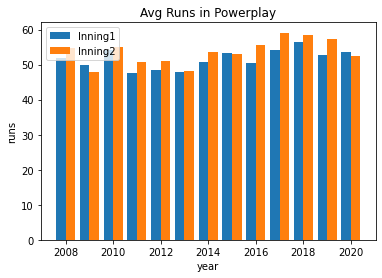

In [35]:
plt.bar(avg_inning1['season']-0.2, avg_inning1['total_runs'], width=0.4)
plt.bar(avg_inning2['season']+0.2, avg_inning2['total_runs'], width= 0.4)
plt.legend(["Inning1", "Inning2"],loc=2 )
plt.title("Avg Runs in Powerplay")
plt.ylabel('runs')
plt.xlabel('year')

* Average runs scored in 2nd inning in powerplay is higher for most of the years
* There is an increase in average runs in powerplay since 2014

###6.3 Powerplay Avg Dismissals

In [36]:
avg_data.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'retired hurt', 'lbw',
       'caught and bowled', 'stumped', 'hit wicket'], dtype=object)

In [37]:
avg_data_grp= avg_data.groupby([ 'season', 'id', 'inning'])['is_wicket'].sum().reset_index()
inning1_wickets=avg_data_grp[avg_data_grp['inning']==1]
inning2_wickets=avg_data_grp[avg_data_grp['inning']==2]
avg_inning1_wickets= inning1_wickets.groupby('season')['is_wicket'].mean().reset_index()
avg_inning2_wickets= inning2_wickets.groupby('season')['is_wicket'].mean().reset_index()
avg_inning2_wickets

,season,is_wicket
0,2008,1.706897
1,2009,1.859649
2,2010,1.583333
3,2011,1.652778
4,2012,1.554054
5,2013,1.842105
6,2014,1.683333
7,2015,1.655172
8,2016,1.433333
9,2017,1.881356


Text(0.5, 0, 'year')

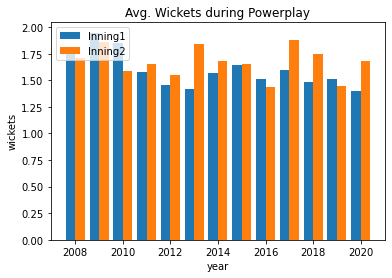

In [38]:
plt.bar(avg_inning1_wickets['season']-0.2, avg_inning1_wickets['is_wicket'], width=0.4)
plt.bar(avg_inning2_wickets['season']+0.2, avg_inning2_wickets['is_wicket'], width=0.4)
plt.legend(["Inning1", "Inning2"],loc=2 )
plt.title("Avg. Wickets during Powerplay")
plt.ylabel('wickets')
plt.xlabel('year')



*   Avg. Wicket taken during powerplay in the 2nd inning is higher compared to first inning of most of the years



##7. Batsman Data


###7.1 Highest Average and strike rate for > 50 matches

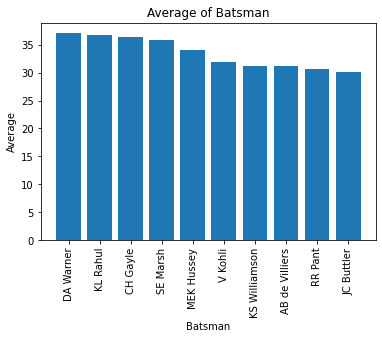

In [39]:
#average of batsman
total_per_match=deliveries.groupby(['batsman', 'id'])['batsman_runs'].sum().reset_index()
avg_runs=total_per_match.groupby('batsman').agg({'batsman_runs':'mean', 'id':'count'}).reset_index()
avg_runs.rename(columns = {'id':'matches_played'}, inplace = True)
avg_runs= avg_runs[avg_runs['matches_played']>=50]
avg_runs=avg_runs.sort_values('batsman_runs', ascending=False)

plt.xticks(rotation='vertical')
plt.bar(avg_runs['batsman'][:10],avg_runs['batsman_runs'][:10])
plt.title("Average of Batsman")
plt.xlabel("Batsman")
plt.ylabel("Average")
plt.show()

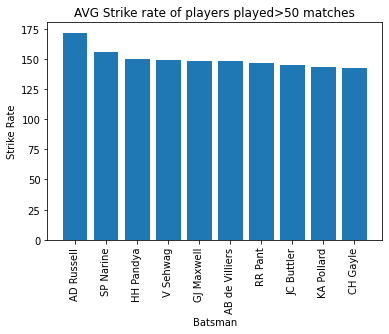

In [40]:
#STRIKE RATE
sr_rate_grp=deliveries.groupby(['batsman', 'id']).agg({'batsman_runs':'sum', 'ball':'count'}).reset_index()
sr_rate=sr_rate_grp.groupby('batsman').agg({'id':'count', 'batsman_runs':'sum', 'ball':'sum'}).reset_index()
sr_rate.rename(columns={'id':'matches_played'}, inplace=True)
sr_rate=sr_rate[sr_rate['matches_played']>=50]

sr_rate['strike_rate']= (sr_rate['batsman_runs']/sr_rate['ball'])*100
sr_rate.sort_values('strike_rate', inplace=True, ascending=False)

plt.xticks(rotation='vertical')
plt.bar(sr_rate['batsman'][:10], sr_rate['strike_rate'][:10])
plt.title('AVG Strike rate of players played>50 matches')

plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.show()



*   David Warner has the highest average of 35+ having played more than 50 matches followed by KL Rahul and Chris Gayle

* AD Russell Has the highest strike rate followed by Narine

###7.2 Orange cap holders

In [41]:
org= matches[['id', 'season']].merge(deliveries, on='id')
batsman_per_season=org.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_per_season.sort_values(['season','batsman_runs'], ascending=[True,False], inplace=True)
batsman_per_season.drop_duplicates(subset=['season'], keep='first', inplace=True)
batsman_per_season

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


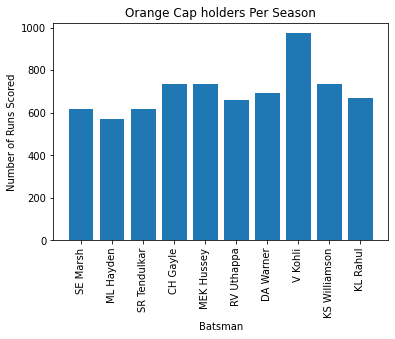

In [42]:

plt.xticks(rotation='vertical')
plt.bar(batsman_per_season['batsman'], batsman_per_season['batsman_runs'])
plt.title('Orange Cap holders Per Season')

plt.xlabel("Batsman")
plt.ylabel("Number of Runs Scored")
plt.show()



*   Virat Kohli has scored most runs in IPL seasonn 2016: 973
*   ML Hyden has got the Orange Cap for least runs in 2009: 572



####Plot (batsman and year) Vs Runs for the above graph

##8. Bowler Analysis

### 8.1 Top 20 wicket Taking Bowlers

In [43]:
bowler_stat=deliveries[['bowler', 'is_wicket', 'total_runs']].groupby('bowler').sum().reset_index()
balls= deliveries[['bowler', 'ball']].groupby('bowler')['ball'].count().reset_index()
bowler=bowler_stat.merge(balls, on= 'bowler')
# bowler_stat['Economy']=bowler_stat['total_runs']
bowler['ball']=bowler['ball']/6
bowler.rename(columns={'total_runs':'runs_given', 'ball':'overs', 'is_wicket':'wickets_taken'}, inplace=True)
bowler['Econ']= bowler['runs_given']/bowler['overs']

bowler.sort_values(['wickets_taken', 'Econ'], inplace=True, ascending=[0, 1])
bowler

,bowler,wickets_taken,runs_given,overs,Econ
350,SL Malinga,188,3486,495.666667,7.032952
99,DJ Bravo,175,3869,474.333333,8.156711
6,A Mishra,169,3913,538.833333,7.261986
276,PP Chawla,164,4330,547.500000,7.908676
133,Harbhajan Singh,161,4038,575.166667,7.020574
...,...,...,...,...,...
267,P Prasanth,0,18,1.000000,18.000000
356,SN Khan,0,6,0.333333,18.000000
55,B Chipli,0,20,1.000000,20.000000
207,LPC Silva,0,21,1.000000,21.000000


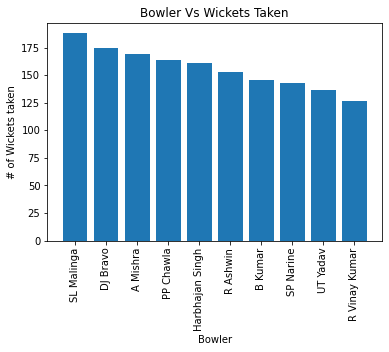

In [44]:
plt.xticks(rotation='vertical')
plt.bar(bowler['bowler'][:10], bowler['wickets_taken'][:10])
plt.title('Bowler Vs Wickets Taken')

plt.xlabel("Bowler")
plt.ylabel("# of Wickets taken")
plt.show()



*   Malinga has taken maximum number of wickets in IPL hisotry b/w 2008 and 2020 followed by DJ Bravo

Plot Bowler Vs (economy and Wickets) for the above graph



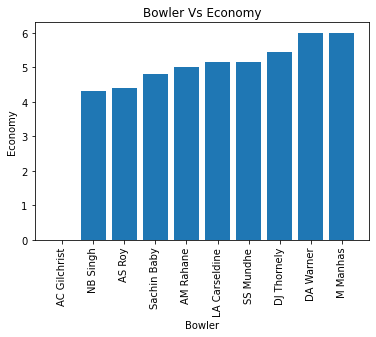

In [45]:
temp=bowler.sort_values('Econ') 
plt.xticks(rotation='vertical')
plt.bar(temp['bowler'][:10], temp['Econ'][:10])
plt.title('Bowler Vs Economy')

plt.xlabel("Bowler")
plt.ylabel("Economy")
plt.show()

while Plotting Bowler Vs Economy, we also need to consider overs bowled by the bowler

###8.2 Purple Cap Holder

In [46]:
deliveries.dismissal_kind.unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [47]:
dismissal=['caught','bowled','lbw', 'caught and bowled','stumped']
bowling= deliveries[deliveries['dismissal_kind'].isin(dismissal)]

merged_data=bowling.merge(matches, on='id')
merged_data

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,...,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,...,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
2,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,...,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
3,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,...,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
4,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,...,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,1237181,2,18,3,HH Pandya,Ishan Kishan,A Nortje,0,0,0,...,DC,bat,MI,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
8573,1237181,1,19,2,AR Patel,SS Iyer,NM Coulter-Nile,0,0,0,...,DC,bat,MI,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
8574,1237181,1,0,1,MP Stoinis,S Dhawan,TA Boult,0,0,0,...,DC,bat,MI,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020
8575,1237181,1,2,4,AM Rahane,S Dhawan,TA Boult,0,0,0,...,DC,bat,MI,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020


In [48]:
wickets=merged_data.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()
wickets.groupby('season')
wickets.sort_values([ 'is_wicket'], ascending=[0], inplace=True)
wickets=wickets.drop_duplicates(subset=['season'], keep='first').sort_values('season')
wickets

,season,bowler,is_wicket
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
367,2011,SL Malinga,28
437,2012,M Morkel,25
509,2013,DJ Bravo,32
639,2014,MM Sharma,23
695,2015,DJ Bravo,26
774,2016,B Kumar,23
861,2017,B Kumar,26


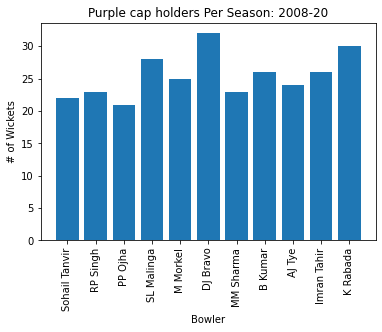

In [49]:
plt.xticks(rotation='vertical')
plt.bar(wickets['bowler'], wickets['is_wicket'])
plt.title('Purple cap holders Per Season: 2008-20')

plt.xlabel("Bowler")
plt.ylabel("# of Wickets")
plt.show()



*   DJ Bravo has taken most number of wickets in a season- 32 followed by Kagiso Rabada with 30 wickets




###8.3 Top 15 Bowlers (Total # of Wickets Taken)

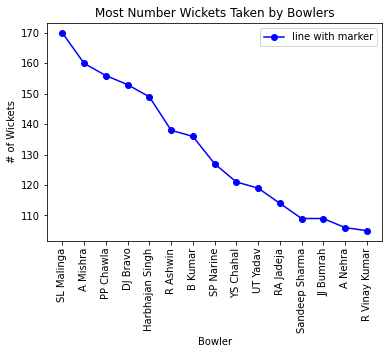

In [50]:
top=merged_data.groupby('bowler')['is_wicket'].sum().reset_index().sort_values('is_wicket', ascending=0)[:15]

plt.xticks(rotation='vertical')
plt.plot(top['bowler'], top['is_wicket'], linestyle='-', marker='o', color='b', label='line with marker')
plt.legend()
plt.title('Most Number Wickets Taken by Bowlers')

plt.xlabel("Bowler")
plt.ylabel("# of Wickets")
plt.show()

###8.4 Top 10 Bowling Performances (Runs/Wicket in a match)

In [51]:
breakthrough=deliveries
dismissal=['caught','bowled','lbw', 'caught and bowled','stumped']
breakthrough['count_wicket']=np.where(breakthrough['dismissal_kind'].isin(dismissal),1,0)

In [52]:
best_perfo=breakthrough.groupby(['id', 'bowler']).agg({'count_wicket':'sum', 'total_runs':'sum'}).reset_index()
best_perfo=best_perfo.sort_values('count_wicket', ascending=False)[:10]
best_perfo['runs/wicket']=best_perfo['total_runs']/best_perfo['count_wicket']
best_perfo.sort_values(['count_wicket', 'total_runs'], ascending=[False, True], inplace=True)
best_perfo

,id,bowler,count_wicket,total_runs,runs/wicket
8499,1178394,AS Joseph,6,14,2.333333
290,336005,Sohail Tanvir,6,15,2.500000
6609,980979,A Zampa,6,19,3.166667
2492,501229,I Sharma,5,13,2.600000
7857,1136585,AS Rajpoot,5,15,3.000000
3067,548311,RA Jadeja,5,16,3.200000
2392,501221,Harbhajan Singh,5,18,3.600000
7084,1082609,B Kumar,5,20,4.000000
4524,598054,JD Unadkat,5,25,5.000000
7374,1082634,JD Unadkat,5,30,6.000000


Text(0.5, 0, 'Runs/Wicket')

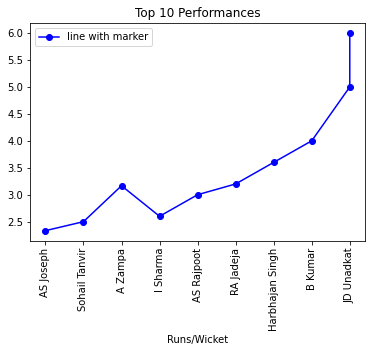

In [53]:
plt.xticks(rotation='vertical')
plt.plot(best_perfo['bowler'], best_perfo['runs/wicket'], linestyle='-', marker='o', color='b', label='line with marker')
plt.legend()
plt.title('Top 10 Performances')
plt.xlabel("Runs/Wicket")



*   As Joseph has achieved best bowling figure in ipl history (2008-20). He conceded 14 runs for 6 wickets




## 9. Winners Analysis

### 9.1 Which Team won maximum seasons

Text(0.5, 1.0, 'Title Wins by IPL teams')

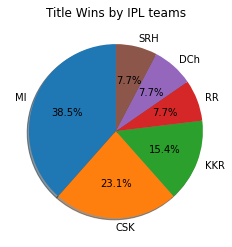

In [60]:
#Assuming last match of the season (as per the data) was the final
max_wins=matches.drop_duplicates(subset=['season'], keep='last')
wins=max_wins['winner'].value_counts().reset_index()
wins.rename(columns={'index':'Team'}, inplace=True)

plt.pie(wins['winner'], labels=wins['Team'], autopct='%1.1f%%',  shadow=True, startangle=90)
# plt.pie( , labels)
plt.title("Title Wins by IPL teams")
# plt.ylabel("Number of Wins")
# plt.show()




*   MI has Won maximum (5) seasons followed by CSK who won 3 seasons




###9.2 Final Played Vs Won

In [55]:
  final_teams= pd.concat([max_wins['team1'], max_wins['team2']]).value_counts().reset_index()
  final_teams=final_teams.rename(columns={'index':'Team', 0:'finals_played'})
  final_teams=final_teams.merge(wins, on='Team' )
  final_teams

,Team,finals_played,winner
0,CSK,8,3
1,MI,6,5
2,KKR,2,2
3,SRH,2,1
4,RR,1,1
5,DCh,1,1


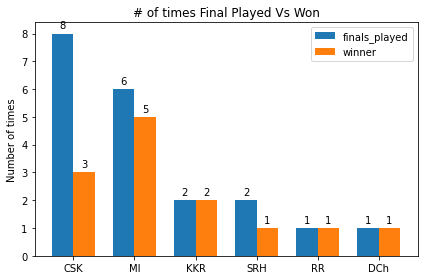

In [56]:
x = np.arange(len(final_teams['Team']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, final_teams['finals_played'], width, label='finals_played')
rects2 = ax.bar(x + width/2, final_teams['winner'], width, label='winner')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of times')
ax.set_title('# of times Final Played Vs Won')
ax.set_xticks(x, list(final_teams['Team']))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# plt.
plt.show()



*   CSK has played the maximum number of IPL finals- 8 times, but only won thrice
*   MI has played 2nd highest number of IPLs but have won 5 times out of 6 which is the highest win/played ratio



###9.3 Final Match Toss Decision Vs Match Decision

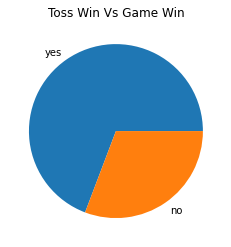

In [58]:
temp= max_wins[max_wins['toss_winner']==max_wins['winner']]
decision= [len(temp), (len(max_wins)-len(temp))]
label=['yes', 'no']

plt.pie(decision, labels=label)
plt.title("Toss Win Vs Game Win")
# plt.ylabel("Number of Wins")
plt.show()



*   Around 70% of the times, team winning the toss in the final match has won the match


